In [64]:
import os 
import shutil 
import glob 
from tqdm import tqdm
from PIL import Image

In [65]:
# Корневая папка
path_to_files = "b:/VIZIT/yolov5"

In [66]:
# Путь к папке с изображениями
input_image_path = path_to_files + "/input_photo"

In [67]:
# Функция для изменения размеров изображения и переноса изображения в папку resized
def scale_image(input_image_path,
                path_to_files=path_to_files
               ):
    """
        Функция приводит изображение к размеру 640х640, 
        производит поворот изображения в соответствии с exif данными.
            Args:
                input_image_path (string): путь к изображению
                path_to_volume (string): путь к внутреннему директорию
                                    
            Returns:
                None (None)    
    """
    path_to_resized_images = ''.join((path_to_files, '/resized_images/'))
    
    
    original_image = Image.open(input_image_path)
    resized_image = original_image.resize((640, 640), Image.LANCZOS)
    
    if hasattr(original_image, '_getexif') or original_image._getexif() is not None:
        orientation = original_image._getexif().get(0x112)
        rotate_values = {3: 180, 6: 270, 8: 90}
        if orientation in rotate_values:
            img = resized_image.rotate(rotate_values[orientation])
        else:
            img = resized_image    
        
    resized_image_path = ''.join((path_to_resized_images, input_image_path.split('\\')[-1]))
    img.save(resized_image_path)


In [68]:
# Преобразованные файлы изображений
path_to_resized_images = ''.join((path_to_files, '/resized_images/'))

if os.path.exists(path_to_resized_images):
    shutil.rmtree(path_to_resized_images)
os.mkdir(path_to_resized_images)
    
img_names_list = glob.glob(input_image_path +'/*.jpg')    
for img_name in tqdm(img_names_list):
    scale_image(img_name)

100%|██████████| 26/26 [00:04<00:00,  5.42it/s]


In [69]:
# Предикт 
!python detect.py --weights b:/VIZIT/yolov5/best_m5.pt --img 640 --conf 0.1 --source b:/VIZIT/yolov5/resized_images  --line-thickness 2 --hide-labels --save-txt

detect: weights=['b:/VIZIT/yolov5/best_m5.pt'], source=b:/VIZIT/yolov5/resized_images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=True, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-21-ga1b6e79 Python-3.9.12 torch-1.8.1+cpu CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/26 B:\VIZIT\yolov5\resized_images\0b2b4f42-2d69-c105-930a-29b80fbcb590.jpg: 640x640 (no detections), 472.8ms
image 2/26 B:\VIZIT\yolov5\resized_images\0c5b478d-a3ce-6653-3e8c-c0e47ee74abd.jpg: 640x640 5 V_class_0.45s, 493.4ms
image 3/26 B:\VIZIT\yolov5\resized_images\0c80426e-7601-d04d-2fec-cd441f96e7b1.jpg: 640x640 (no detections), 510.2ms
image 4/26 B:\VIZ

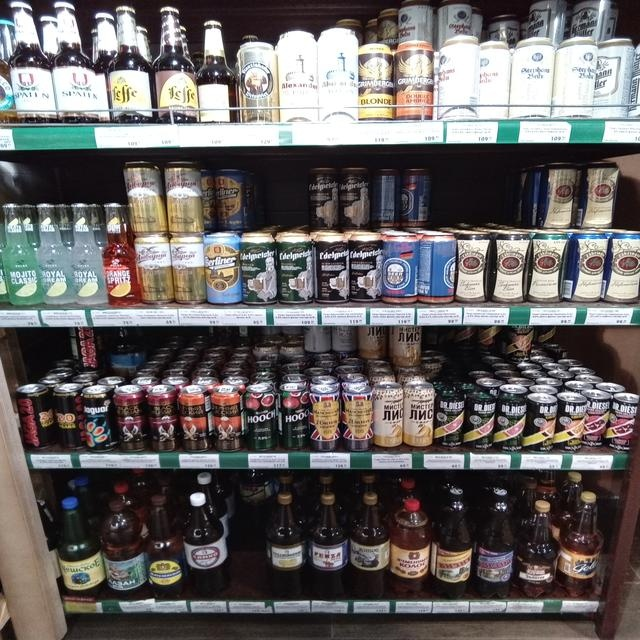

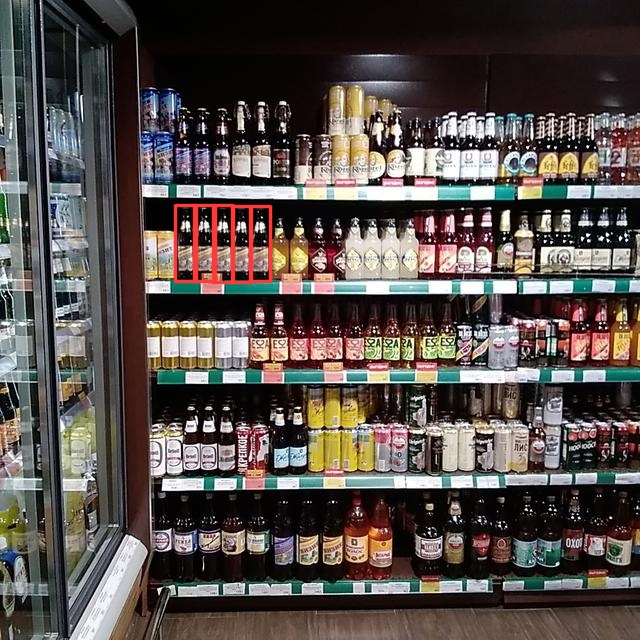

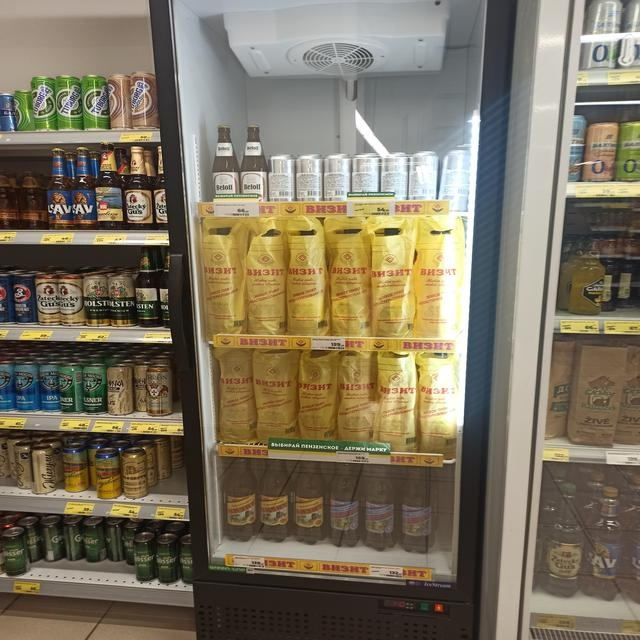

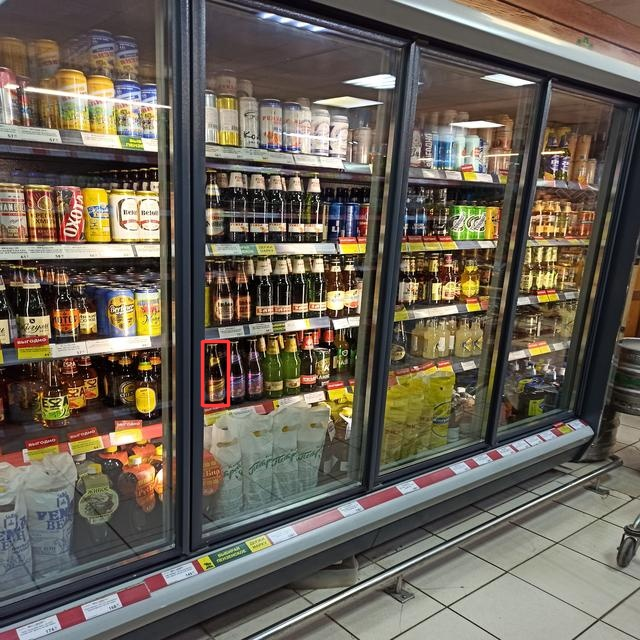

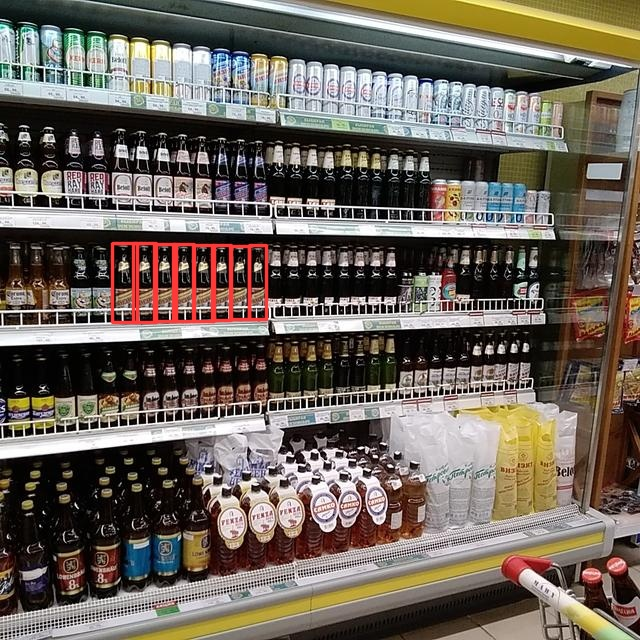

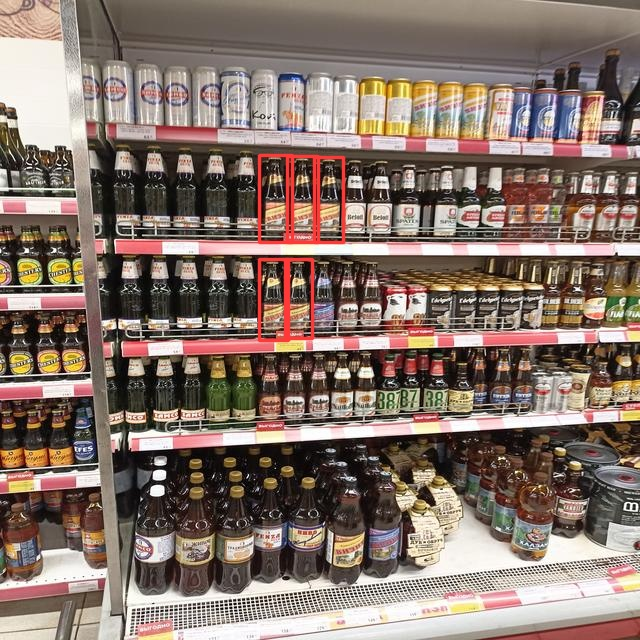

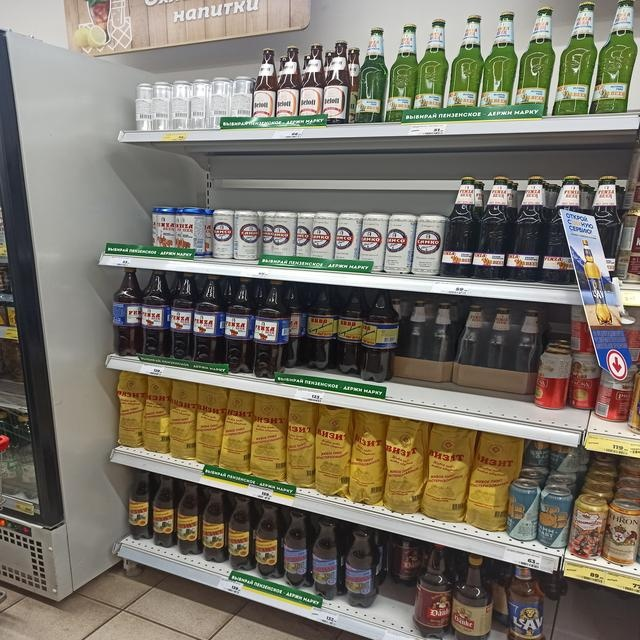

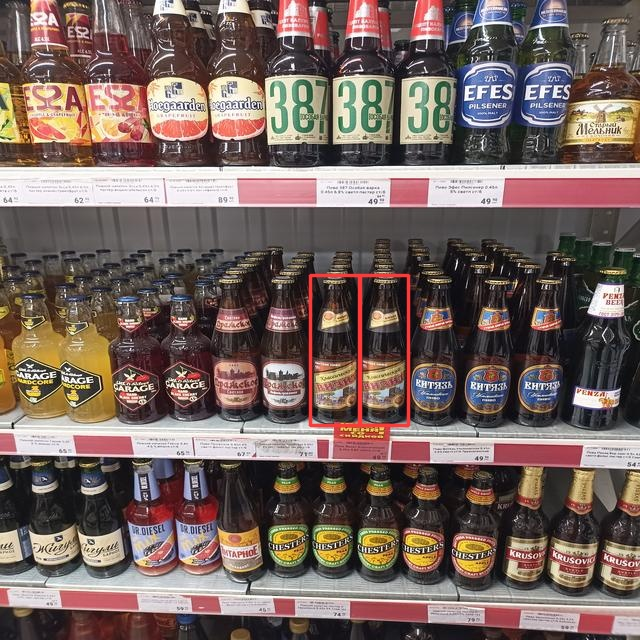

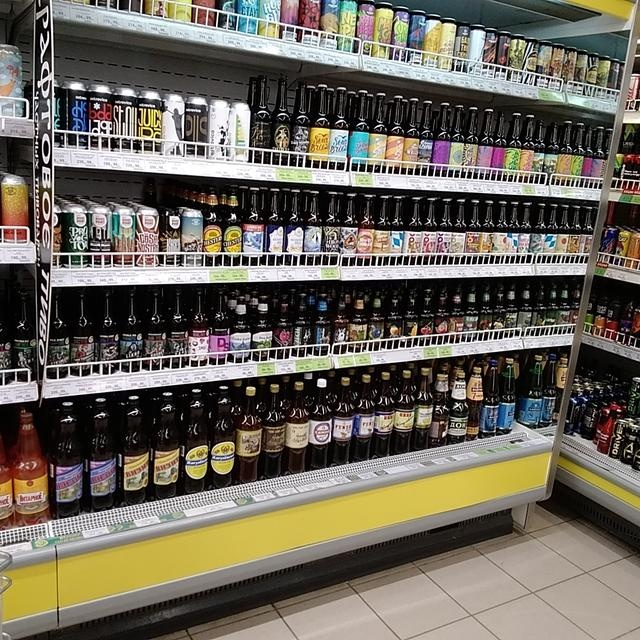

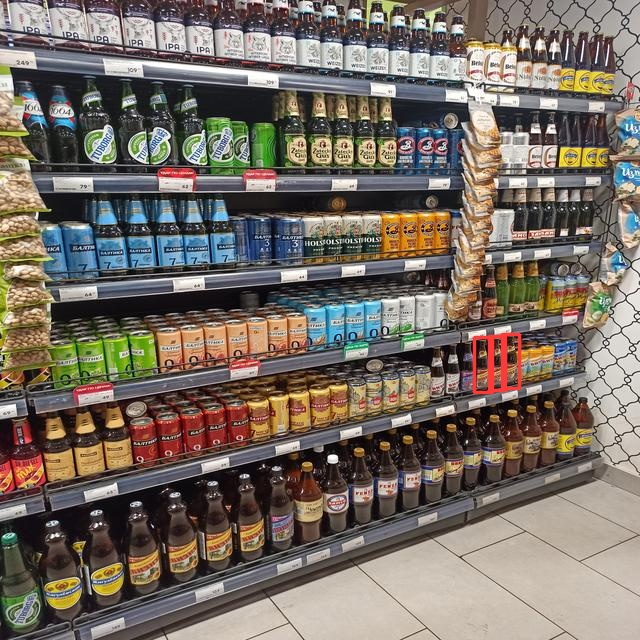

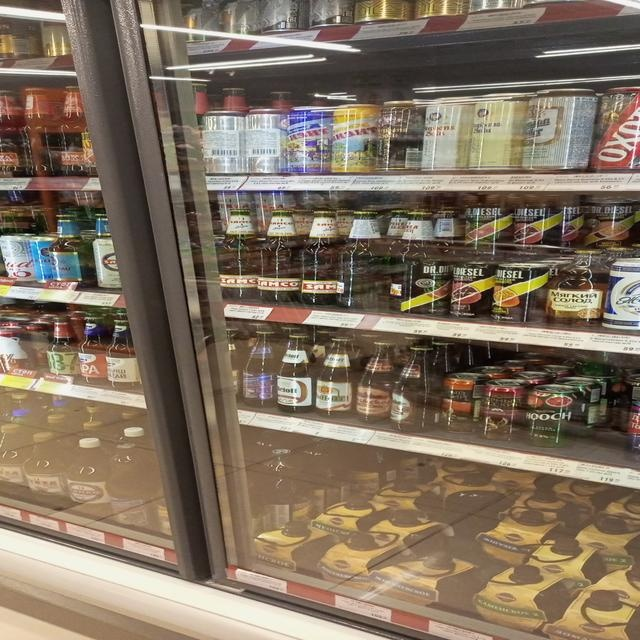

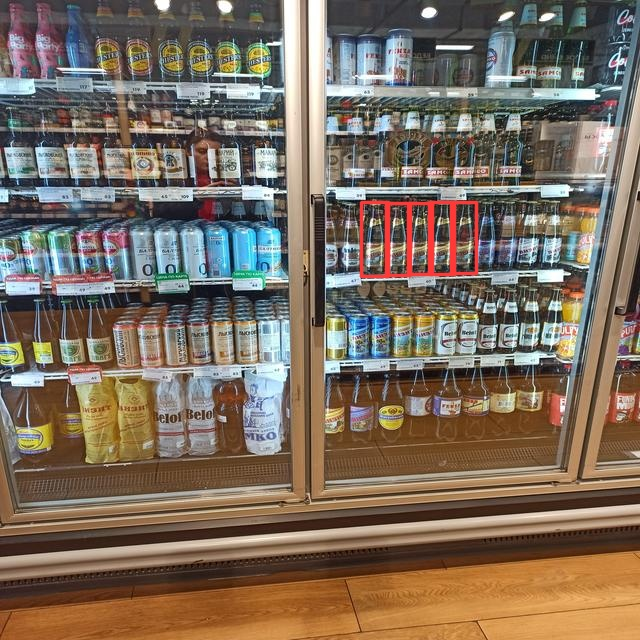

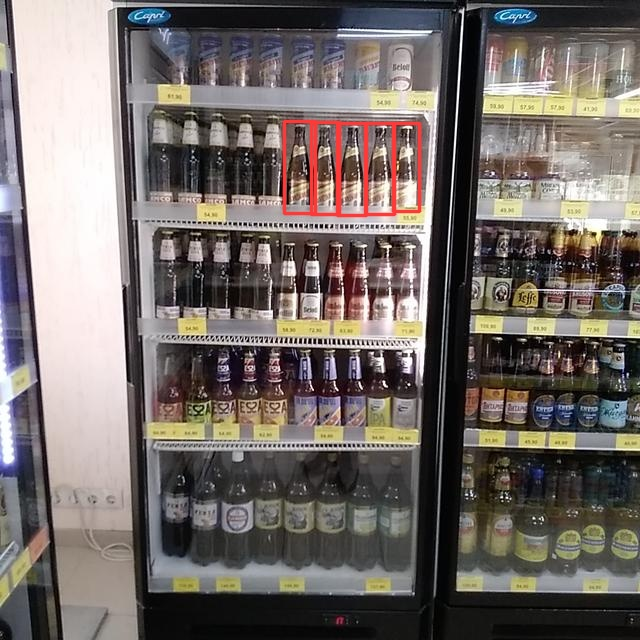

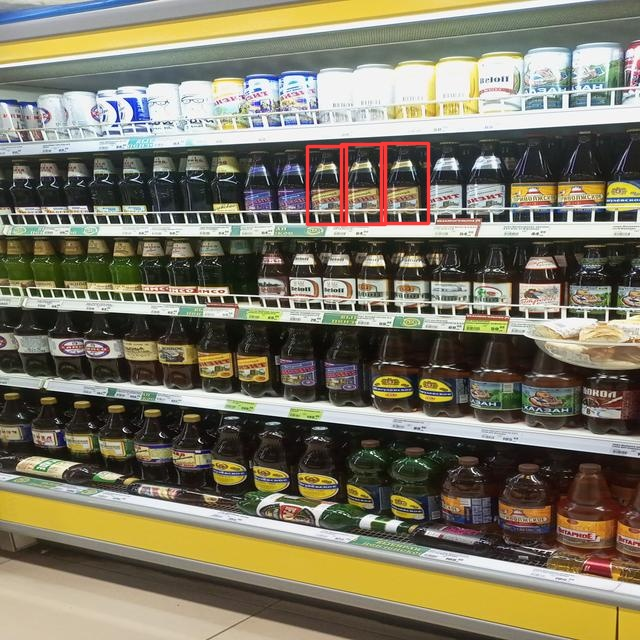

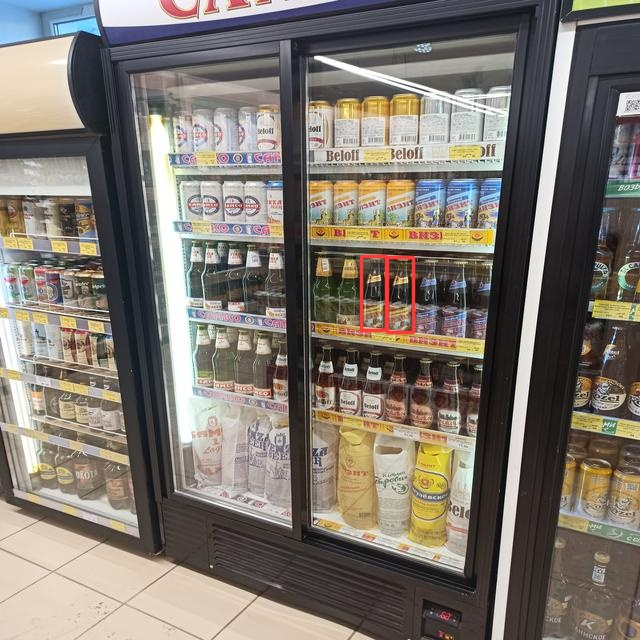

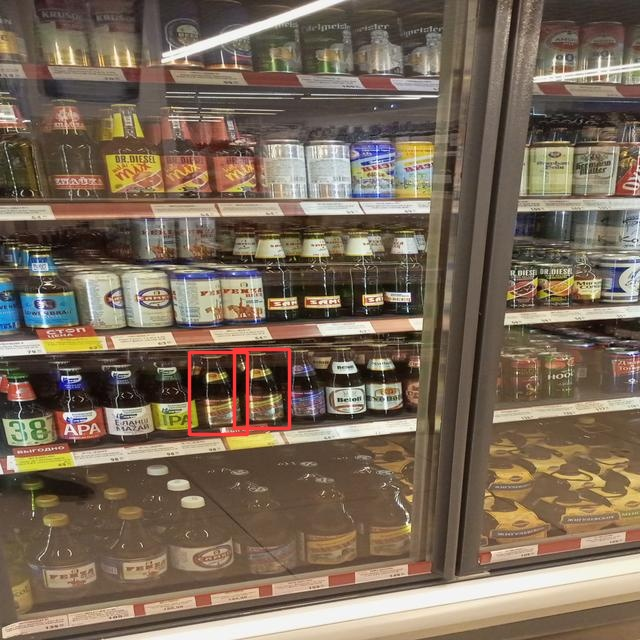

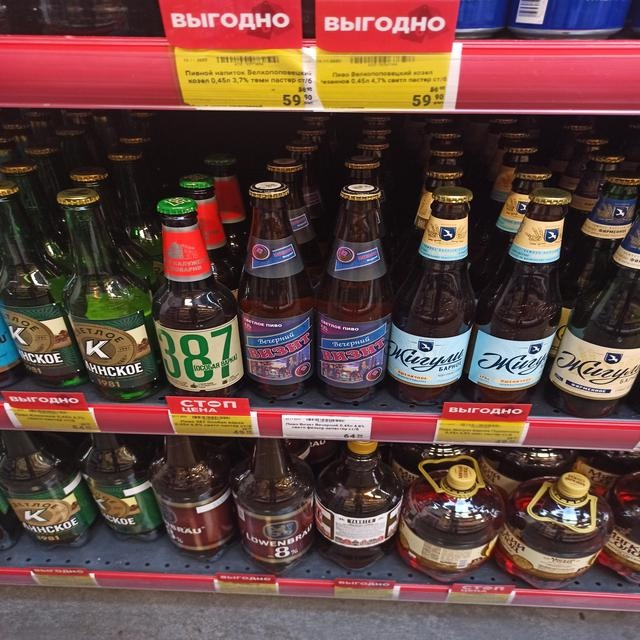

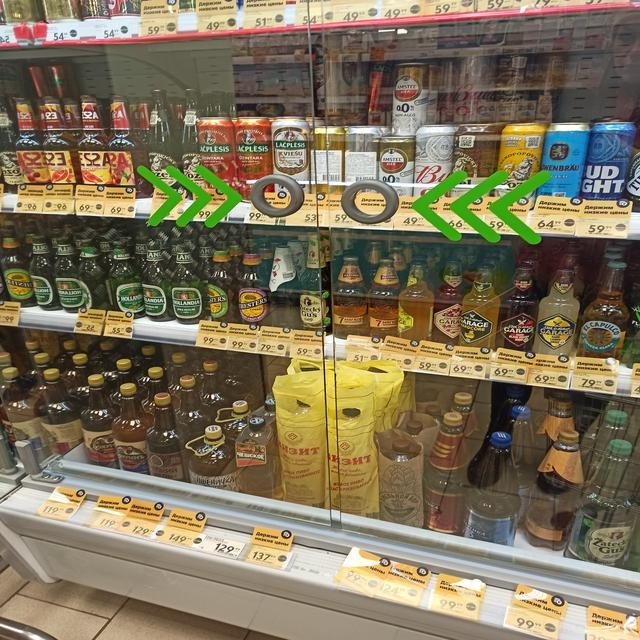

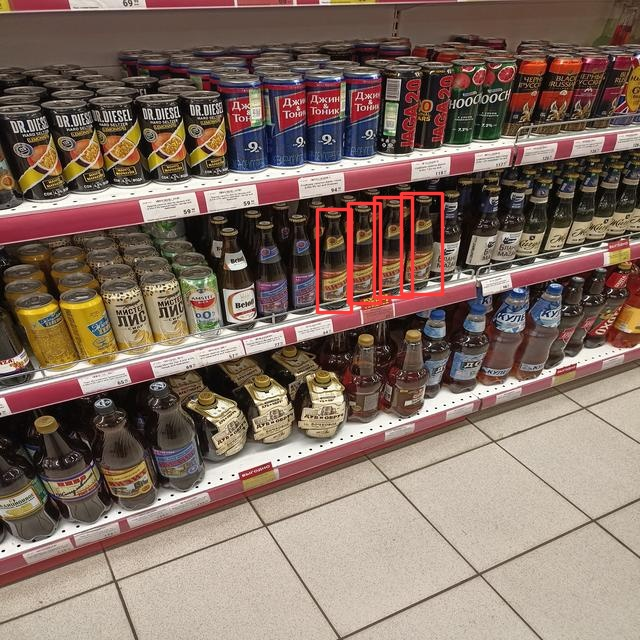

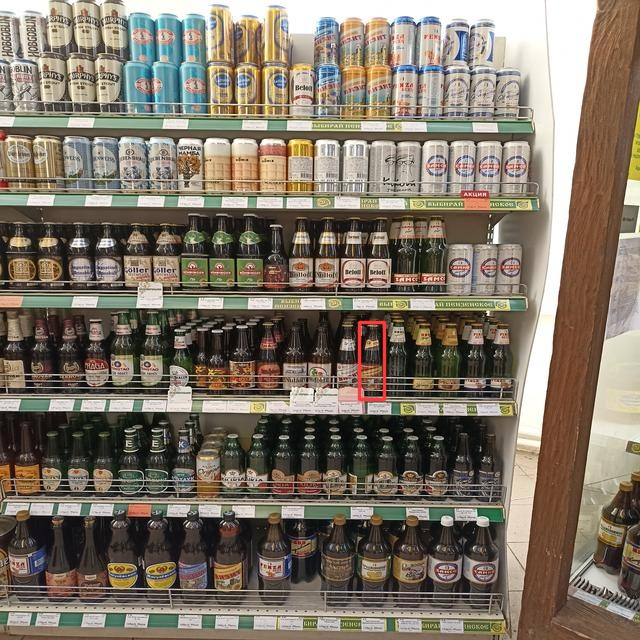

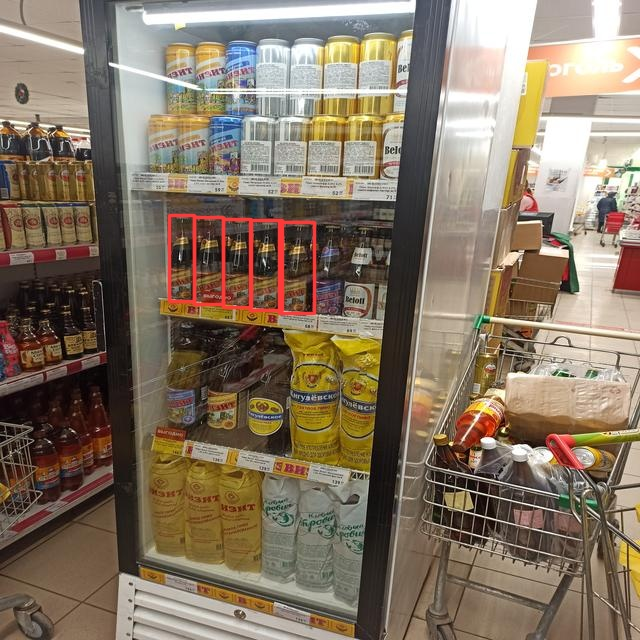

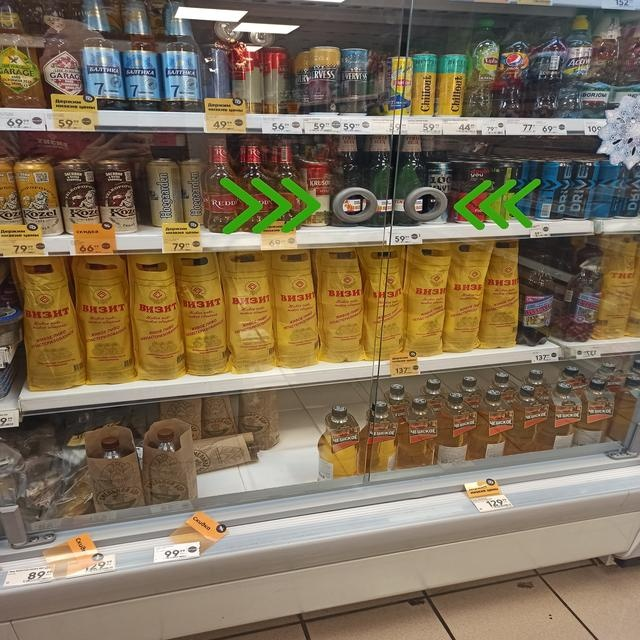

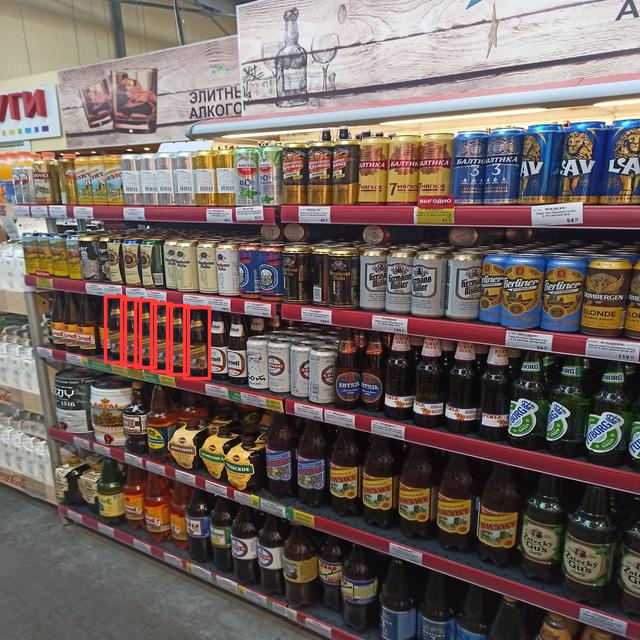

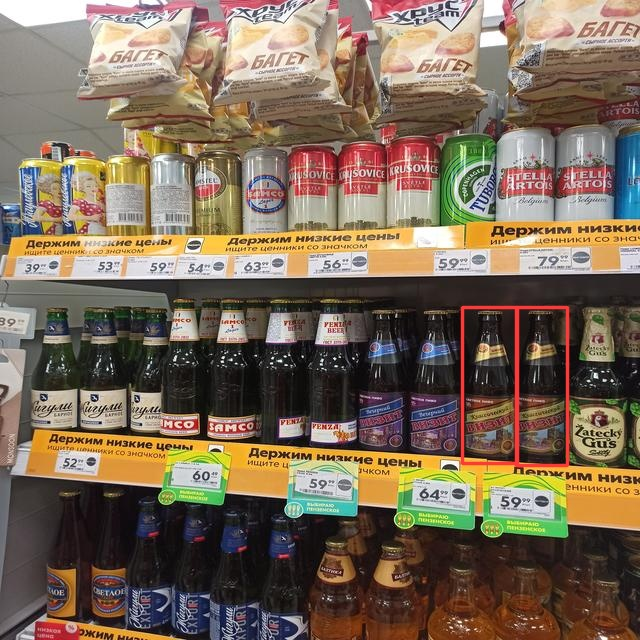

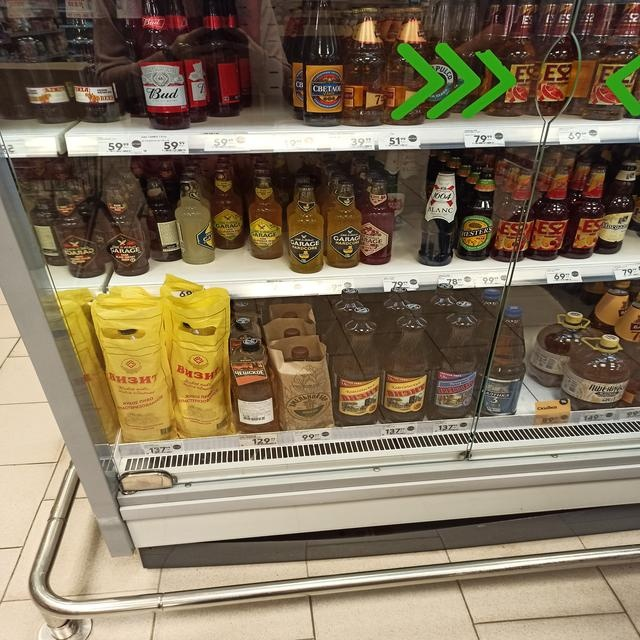

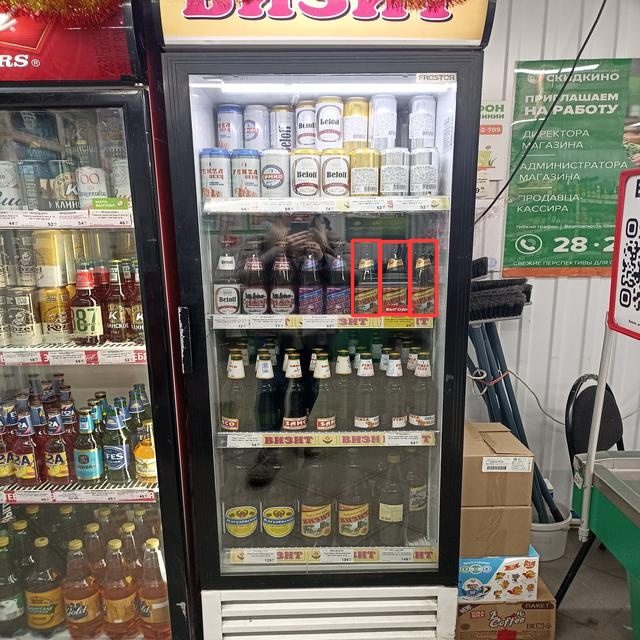

In [70]:
# Визуализация предикта
from IPython.display import Image, display
path_inference = glob.glob("b:/VIZIT/yolov5/runs/detect/*")[-1]
glob.glob(path_inference+'/*.jpg')

for imageName in glob.glob(path_inference+'/*.jpg'): #assuming JPG
    display(Image(filename=imageName))